# Amortized Posterior
In the previous example, we ran the sbi for a single observation, generating a posterior and predicting the parameters of that observation
We can run the posterior for multiple observations without the need to re-run the inference. This is because the posterior is Amortized.

In [2]:
import torch
from sbi import analysis as analysis
from sbi import utils as utils
from sbi.inference import NPE, simulate_for_sbi
from sbi.utils.user_input_checks import (
    check_sbi_inputs,
    process_prior,
    process_simulator,
)

In [3]:
# Define the number of parameters
num_dim = 3

In [4]:
def simulator(theta):
    # linear guassian
    return theta + 1.0 + torch.randn_like(theta) * 0.1

In [6]:
prior = utils.BoxUniform(low=-2 * torch.ones(num_dim), high=2 * torch.ones(num_dim))

In [7]:
# Check prior, return PyTorch prior
prior, num_parameters, prior_returns_numpy = process_prior(prior)

In [8]:
# Check simulator, returns PyTorch simulator able to simulate batches.
simulator = process_simulator(simulator, prior, prior_returns_numpy)

In [9]:
# Consistency check after making ready fo# Visualise the resultsr sbi
check_sbi_inputs(simulator, prior)

In [10]:
# Build inference object
inference = NPE(prior=prior)

In [11]:
# Generate simulations
theta, x = simulate_for_sbi(simulator, proposal=prior, num_simulations=2000)

100%|███████████████████████████████████| 2000/2000 [00:00<00:00, 124852.77it/s]


In [12]:
# Append simulations to the inference object
inference = inference.append_simulations(theta, x)

In [13]:
# Train the density estimator
density_estimator = inference.train()

 Neural network successfully converged after 91 epochs.

In [14]:
# Build the posterior from the trained inference model
posterior = inference.build_posterior(density_estimator)

# Amortized Inference

Note that, so far, we have followed the same steps as we did previously in our first example. we can now evaluate the posterior for different observations without having to re-run the inference. An amortized posterior is one that is not focused on any particular observation.

In [18]:
# Lets take 2 observations
theta_1 = prior.sample((1,))
x_obs_1 = simulator(theta_1)
theta_2 = prior.sample((1,))
x_obs_2 = simulator(theta_2)

Drawing 10000 posterior samples: 100%|█| 10000/10000 [00:00<00:00, 87138.98it/s]


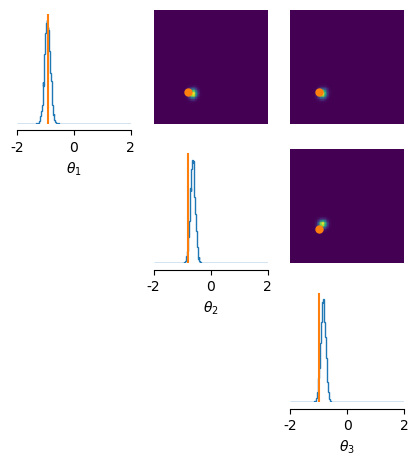

In [19]:
# We can plot the posterior for x_1
posterior_samples_1 = posterior.sample((10000,), x=x_obs_1)
# plot posterior samples
_ = analysis.pairplot(
    posterior_samples_1, limits=[[-2, 2], [-2, 2], [-2, 2]], figsize=(5, 5),
    labels=[r"$\theta_1$", r"$\theta_2$", r"$\theta_3$"],
    points=theta_1 # add ground truth thetas
)

Drawing 10000 posterior samples: 100%|█| 10000/10000 [00:00<00:00, 91515.55it/s]


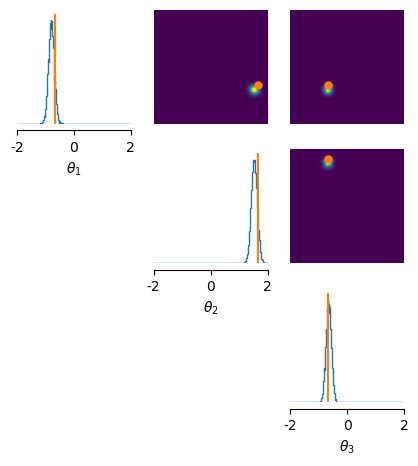

In [20]:
# and the same for x_2
posterior_samples_2 = posterior.sample((10000,), x=x_obs_2)
# plot posterior samples
_ = analysis.pairplot(
    posterior_samples_2, limits=[[-2, 2], [-2, 2], [-2, 2]], figsize=(5, 5),
    labels=[r"$\theta_1$", r"$\theta_2$", r"$\theta_3$"],
    points=theta_2 # add ground truth thetas
)